# NGUYỄN KIM GROUP

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('NKG Historical Data.csv')
df1=df.reset_index()['Price']

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      24 non-null     object 
 1   Price     24 non-null     float64
 2   Open      24 non-null     object 
 3   High      24 non-null     object 
 4   Low       24 non-null     object 
 5   Vol.      24 non-null     object 
 6   Change %  24 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.4+ KB


In [4]:
df1.head()

0    25650.0
1    25700.0
2    25500.0
3    25500.0
4    24850.0
Name: Price, dtype: float64

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [7]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [8]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [9]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

IndexError: tuple index out of range

In [ ]:
# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Users\hangt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - loss: 0.1144
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0109
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0029
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0015
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0013
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0013
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0011
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0011
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0011
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 9.5678e-04
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 9.8574e-04
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0010
Epoch 13/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 8.9104e-04
Epoch 14/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 8.7124e-04
Epoch 15/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [ ]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 0.24516374852653733


In [ ]:
# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing MAE: 0.1997853891344836


In [ ]:
# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - ytest)/np.abs(y_pred))
print('Testing MAPE:', test_mape)

Testing MAPE: 0.04886851395972764


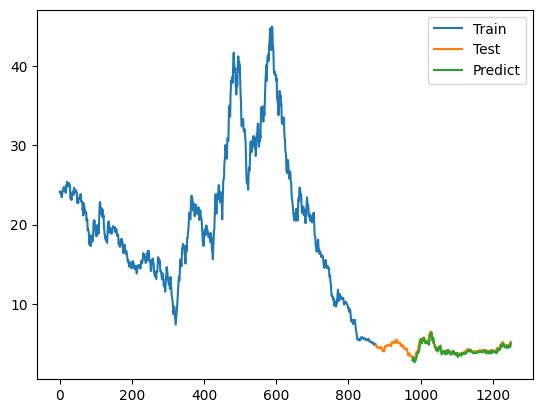

In [ ]:
# 14.Vẽ hình
# Train
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
# Test
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
# Dự đoán trên tập test
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

# Dự đoán 30 ngày tiếp theo

In [ ]:

# 13. Predict the next 30 days
x_input = test_data[-100:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1

[0.05190546]
101
1 day input [0.02590304 0.02685361 0.02637833 0.02756654 0.02804183 0.02804183
 0.02804183 0.02851711 0.02851711 0.02970532 0.03041825 0.03041825
 0.0289924  0.0289924  0.02780418 0.0273289  0.0289924  0.0289924
 0.03065589 0.02804183 0.03136882 0.03136882 0.02875475 0.02946768
 0.03231939 0.03136882 0.02661597 0.02685361 0.02709125 0.02780418
 0.0289924  0.02923004 0.02851711 0.02685361 0.02709125 0.02709125
 0.02590304 0.02590304 0.02804183 0.0289924  0.02970532 0.02780418
 0.02542776 0.02994297 0.02970532 0.03136882 0.0289924  0.02994297
 0.02994297 0.02994297 0.02970532 0.02970532 0.02827947 0.02780418
 0.0273289  0.02709125 0.02661597 0.0289924  0.0335076  0.03374525
 0.0368346  0.03588403 0.03707224 0.03540875 0.03540875 0.03754753
 0.03635932 0.03802281 0.04396388 0.04681559 0.04776616 0.04538973
 0.04538973 0.05038023 0.04990494 0.05537072 0.0529943  0.04610266
 0.04610266 0.04538973 0.04538973 0.04348859 0.04277567 0.04111217
 0.04443916 0.04396388 0.04538973 

2 day output [[0.04821635]]
3 day input [0.02637833 0.02756654 0.02804183 0.02804183 0.02804183 0.02851711
 0.02851711 0.02970532 0.03041825 0.03041825 0.0289924  0.0289924
 0.02780418 0.0273289  0.0289924  0.0289924  0.03065589 0.02804183
 0.03136882 0.03136882 0.02875475 0.02946768 0.03231939 0.03136882
 0.02661597 0.02685361 0.02709125 0.02780418 0.0289924  0.02923004
 0.02851711 0.02685361 0.02709125 0.02709125 0.02590304 0.02590304
 0.02804183 0.0289924  0.02970532 0.02780418 0.02542776 0.02994297
 0.02970532 0.03136882 0.0289924  0.02994297 0.02994297 0.02994297
 0.02970532 0.02970532 0.02827947 0.02780418 0.0273289  0.02709125
 0.02661597 0.0289924  0.0335076  0.03374525 0.0368346  0.03588403
 0.03707224 0.03540875 0.03540875 0.03754753 0.03635932 0.03802281
 0.04396388 0.04681559 0.04776616 0.04538973 0.04538973 0.05038023
 0.04990494 0.05537072 0.0529943  0.04610266 0.04610266 0.04538973
 0.04538973 0.04348859 0.04277567 0.04111217 0.04443916 0.04396388
 0.04538973 0.04443916 

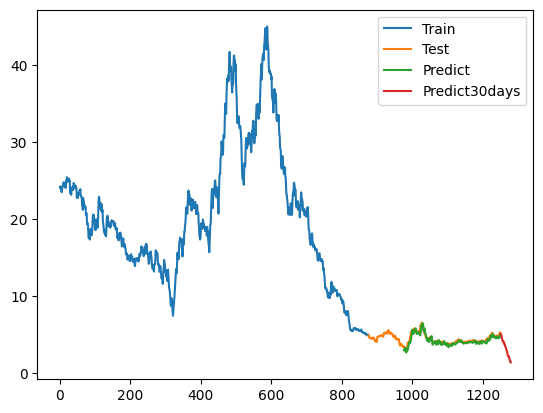

In [ ]:

# 14.Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

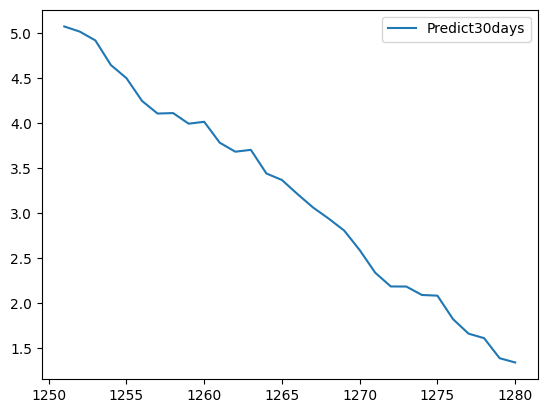

In [ ]:
# 14.Vẽ hình
# Dự đoán 30 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict30days'])
plt.show()

In [ ]:
print(scaler.inverse_transform(lst_output))

[[5.07418194]
 [5.01678748]
 [4.91894387]
 [4.64486509]
 [4.49926197]
 [4.2461146 ]
 [4.10553259]
 [4.11083563]
 [3.99287364]
 [4.01380239]
 [3.78107931]
 [3.68120047]
 [3.70190646]
 [3.43890197]
 [3.36635816]
 [3.20960876]
 [3.06057134]
 [2.93757183]
 [2.80438553]
 [2.58681075]
 [2.33469441]
 [2.18229605]
 [2.18122687]
 [2.08730555]
 [2.07978616]
 [1.81922113]
 [1.65709509]
 [1.60711272]
 [1.38388375]
 [1.33645406]]
